# Módulo PicketFence vs TLF

## Objetivo

* Este notebook está dedicado al análisis del módulo PicketFence de Pylinac y de los archivos TLF generados por las pruebas PF (estáticas y dinámicas) establecidas por Ling. Si las separaciones de los pickets obtenidos con las imágenes EPID coinciden con las obtenidas con los TLF, entonces se puede validar que la información contenida dentro de los TLF es correcta.

## Metas

    1) Se pretende obtener las separaciones de los pickets mediante el módulo PicketFence y las imágenes EPID.
    2) Se pretende obtener las separaciones de los pickets mediante el módulo TrajectoryLog y los archivos TLF extraidos al ejecutar las pruebas Picket Fence estáticas y dinámicas (RapidArc) de Ling.

### Meta 1
Evaluación de una prueba Picket Fence con errores intencionales con gantry estático a 62° y colimador a 0°
Actualización: El archivo TLF muestra que el gantry giró de 10° a 118° y el colimador estuvo a 180°.

In [1]:
# importamos módulo de análisis PicketFence
from pylinac import PicketFence
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib notebook

In [2]:
# Cargamos en memoria la imágen DICOM de la prueba PF
#img = PicketFence(filename=r"../TLF_Ling/T12PFError/RI.1.2.246.352.62.1.5555881330612506364.7902727833082858126.dcm", filter=None, log=None, use_filename=False)
#img = PicketFence(filename=r"../TLF_Ling/T11PFRA/RI.1.2.246.352.62.1.4789251255500405279.11997526324275456427.dcm", filter=None, log=None, use_filename=False)
img = PicketFence(filename=r"../TLF_Ling/T02/PF_0/0.dcm", filter=None, log=None, use_filename=False)

<IPython.core.display.Javascript object>


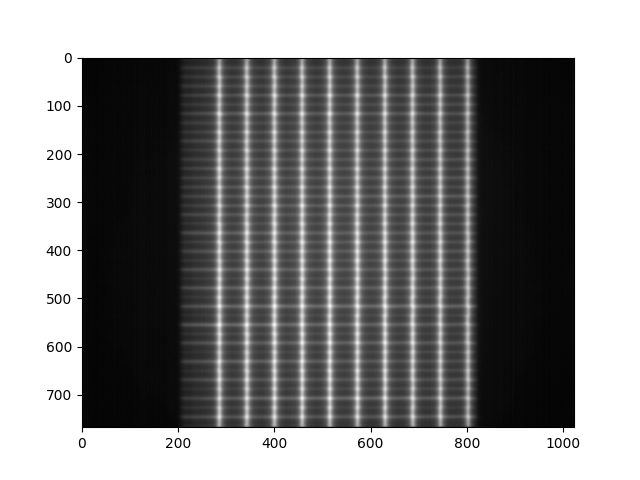

<AxesSubplot:>

In [3]:
# Mostramos la imagen
img.image.plot()

#### Propiedades de la imagen DICOM

In [4]:
# Dimensión de pixeles
img.image.array.shape

(768, 1024)

In [5]:
# The position of the beam central axis. If no DICOM translation tags are found then the center is returned.
img.image.cax

Point(x=512.00, y=384.01, z=0.00)

In [6]:
# Return the center position of the image array as a Point.
img.image.center

Point(x=512.00, y=384.00, z=0.00)

In [7]:
# Collimator angle of the irradiation
img.image.collimator_angle

0

In [8]:
# Couch angle of the irradiation.
img.image.couch_angle

0

In [9]:
# Fecha de creación
img.image.date_created()

'Friday, January 03, 2020'

In [10]:
#The dots-per-inch of the image, defined at isocenter.
img.image.dpi

97.19366440088466

In [11]:
# The Dots-per-mm of the image, defined at isocenter.
# E.g. if an EPID image is taken at 150cm SID, the dpmm will scale back to 100cm.
img.image.dpmm

3.82652222050727

In [12]:
# Gantry angle of the irradiation.
img.image.gantry_angle # Comprobar con el archivo TLF

90.0000000000451

In [13]:
img.image.metadata.RTImageSID, img.image.metadata.RadiationMachineSAD

("1499.99671043885", "1000.0")

In [14]:
img.image.metadata

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: RT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.246.352.62.1.5038032125532754333.9053734298333659294
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.246.352.70.2.1.70.2
(0002, 0013) Implementation Version Name         SH: 'MergeCOM3_460'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'PORTAL', 'ACQUIRED_DOSE']
(0008, 0012) Instance Creation Date              DA: '20200103'
(0008, 0013) Instance Creation Time              TM: '121324'
(0008, 0016) SOP Class UID                       UI: RT Image Storage
(0008, 

In [15]:
# The physical size of the image in mm.
img.image.physical_shape

(200.70444015301933, 267.6059202040258)

#### Analizando la imagen

Si no se ejecuta el comando ´´´analyze" el atributo "pickets" no se crea, el cual es utilizado por otros métodos.

In [16]:
# tolerance en mm
# action_tolerance debe ser menor a tolerance, This value is usually meant to indicate that a physicist
# should take an "action" to reduce the error, but should not stop treatment.
# num_pickets = None: deja que el programa dectecte por sí solo cuantos hay
# orientation None: determina la orientación vertical u horizontal de los pickets
img.analyze(tolerance=0.5, action_tolerance=0.2, hdmlc=False, num_pickets=None,
            sag_adjustment= 0, orientation=None, invert=False)

<IPython.core.display.Javascript object>


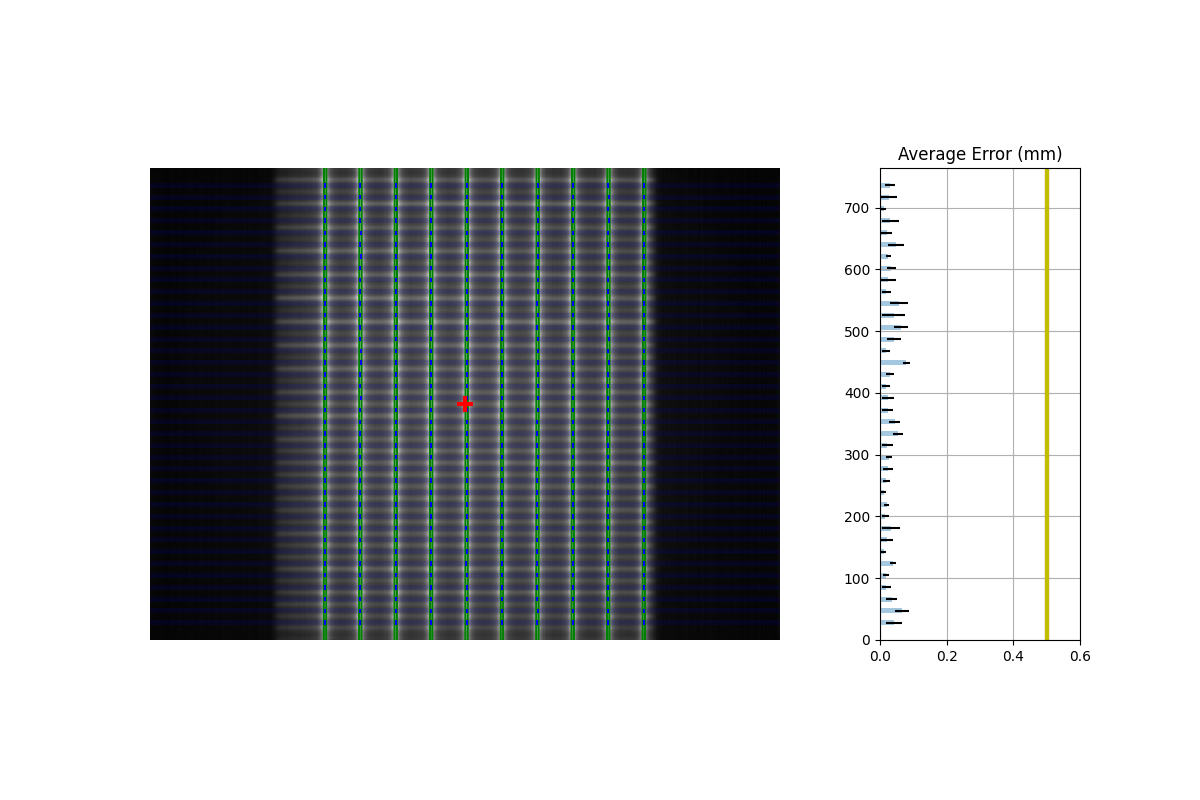

In [17]:
# Imagen analizada
#plt.figure()
img.plot_analyzed_image()

#### Explorando resultados generales

In [18]:
# Return the maximum error found (mm).
img.max_error

0.11010953817146864

In [19]:
# Return the picket number where the maximum error occurred.
# Asume indexación en 0
# Se suma 1 y se cuenta de izquierda a derecha
img.max_error_picket + 1

8

In [20]:
# Return the number of pickets determined.
img.num_pickets

10

In [21]:
# The orientation of the image, either Up-Down or Left-Right.
img.orientation

'Up-Down'

In [22]:
# Boolean specifying if all MLC positions were within tolerance.
img.passed

True

In [23]:
# Return the percentage of MLC positions under tolerance.
img.percent_passing

100.0

In [24]:
# Return results of analysis. Use with print().
print(img.results())

Picket Fence Results: 
100.0% Passed
Median Error: 0.025mm 
Mean picket spacing: 15.0mm 
Picket offsets from CAX (mm): 59.2 44.3 29.3 14.3 -0.7 -15.7 -30.7 -45.7 -60.7 -75.8
Max Error: 0.110mm on Picket: 7, Leaf: 1


##### pickets

In [25]:
# Returns several lists of information about the MLC measurements. For use with plotting.
#plt.figure()
# error_plot_positions -> indica la posición de los pares (en pixel creo :v)
#error_means -> errores promedio de los pares (en mm)
#error_stds -> Desviación std de la distribución de errores de los pares (en mm)
#mlc_leaves -> indice REAL de los pares de láminas
pos, vals, err, leaf_nums = img.pickets.error_hist()
pos[0], leaf_nums[0]

(28.0, [49, 72])

### Importante (indexado inicia en uno en los pares de hoja 1-120)

* Los índices de las hojas se cuentan de arriba hacia abajo (Para la imagen de arriba), es decir, [1-120, 2-119, ...,60-61].
* Puesto que el EPID sólo ve las láminas internas, los pares de hoja son entonces:[12-109, ..., 49-72]
* No hay confusión: la salida de la celda anterior muestra que el par 49-72 se encuentra en el píxel 28 del eje Y de la imagen anterior.

In [26]:
index = img.max_error_leaf
index, leaf_nums[index], vals[index]

(1, [48, 73], 0.06609420350254998)

##### Settings

In [27]:
# The width of a "large" leaf in pixels.
img.settings.large_leaf_width

38.2652222050727

In [28]:
# Return a set of leaf centers perpendicular to the leaf motion based on the position of the CAX.
# Posición en píxeles de los centros de cada par de láminas
img.settings.leaf_centers

array([ 28,  47,  66,  85, 105, 124, 143, 162, 181, 200, 219, 239, 258,
       277, 296, 315, 334, 353, 372, 392, 411, 430, 449, 468, 487, 506,
       526, 545, 564, 583, 602, 621, 640, 659, 679, 698, 717, 736])

In [29]:
# The number of large leaves; depends on HDMLC status.
img.settings.number_large_leaves

20

In [30]:
# The number of small leaves; depends on HDMLC status.
img.settings.number_small_leaves

40

In [31]:
# The width of a "small" leaf in pixels.
img.settings.small_leaf_width

19.13261110253635

<IPython.core.display.Javascript object>


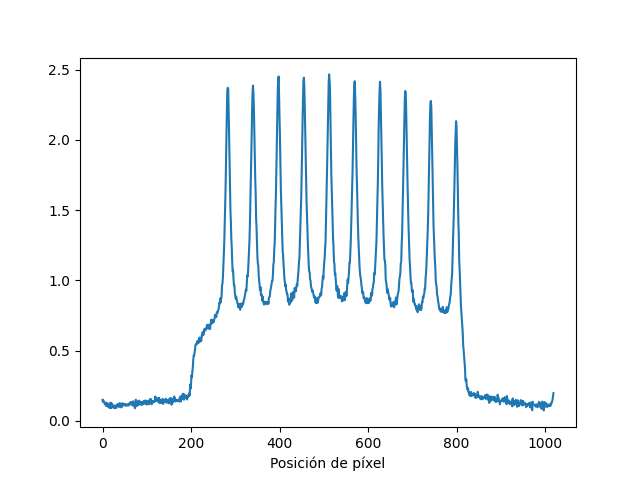

In [32]:
# Retomando pickets
# Plot the profile.
img.pickets.image_mlc_inplane_mean_profile.plot()
plt.xlabel("Posición de píxel");

In [33]:
# "The average distance between pickets in mm."
# Distancia entre pickets
img.pickets.mean_spacing

14.99463107208621

In [34]:
# Whether all the pickets passed tolerance.
img.pickets.passed

True

### Pickets

Es una lista que contiene información de los pcikets encontrados

In [35]:
# The absolute median error of the MLC measurements.
img.pickets.pickets[0].abs_median_error

0.0248242095769032

In [36]:
# Parece ser el pixel donde se encuentra el picket (en el eje X)
img.pickets.pickets[0].approximate_idx

283

In [37]:
# The distance from the CAX to the picket, in mm.
img.pickets.pickets[0].dist2cax

59.19755771646038

In [38]:
# An array containing the error values of all the measurements.
img.pickets.pickets[0].error_array, img.pickets.pickets[0].error_array.shape 

(array([0.06996889, 0.06422064, 0.03768981, 0.00462564, 0.03375489,
        0.04068567, 0.02033036, 0.0081729 , 0.0706247 , 0.01521806,
        0.01743396, 0.01310656, 0.02134401, 0.00867474, 0.02228789,
        0.04410384, 0.06997384, 0.05506901, 0.02503527, 0.02543772,
        0.02461315, 0.04946958, 0.08304556, 0.02907467, 0.0090772 ,
        0.05012036, 0.01211265, 0.01040855, 0.03441565, 0.02398705,
        0.02620296, 0.0140455 , 0.0948055 , 0.00112273, 0.02904991,
        0.01115397, 0.00935531, 0.01026455]),
 (38,))

In [39]:
# The fit of a polynomial to the MLC measurements.
img.pickets.pickets[0].fit # (pendiente, b=x)

poly1d([3.43199089e-04, 2.83348128e+02])

In [40]:
# The max error of the MLC measurements.
img.pickets.pickets[0].max_error

0.09480550284975318

In [41]:
# The color of the measurement when the PF image is plotted, based on pass/fail status.
img.pickets.pickets[0].mlc_meas[0].bg_color

'b'

In [42]:
# Return the center of the line as a Point.
# es el centro del par de hoja para ese picket en particular (0)
img.pickets.pickets[0].mlc_meas[0].center

Point(x=283.09, y=28.00, z=0.00)

In [43]:
# Los extremos sup e inf del par de hojas
img.pickets.pickets[0].mlc_meas[0].point1, img.pickets.pickets[0].mlc_meas[0].point2

(Point(x=283.09, y=26.00, z=0.00), Point(x=283.09, y=30.00, z=0.00))

In [44]:
# The error (difference) of the MLC measurement and the picket fit.
img.pickets.pickets[0].mlc_meas[0].error

0.06996889214506465

In [45]:
# The fit of a polynomial to the MLC measurements.
img.pickets.pickets[0].mlc_meas[0].fit

poly1d([3.43199089e-04, 2.83348128e+02])

In [46]:
# The leaf pair that formed the MLC measurement.
img.pickets.pickets[0].mlc_meas[0].leaf_pair

[49, 72]

In [47]:
# Return length of the line, if finite.
img.pickets.pickets[0].mlc_meas[0].length

4.0

In [48]:
# Return the slope of the line.
#img.pickets.pickets[0].mlc_meas[0].m

In [49]:
# Reciben como argumento alguna de las 38 mediciones realizadas por picket
img.pickets.pickets[0].mlc_passed(0), img.pickets.pickets[0].mlc_passed_action(0)

(True, True)

<IPython.core.display.Javascript object>


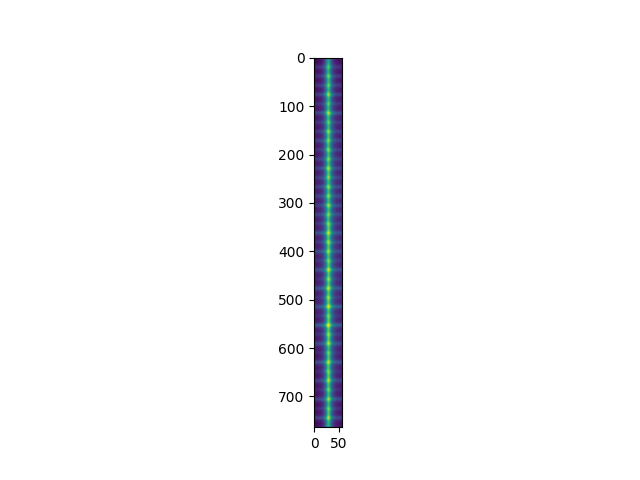

In [50]:
# A slice of the whole image that contains the area around the picket.
plt.figure()
plt.imshow(img.pickets.pickets[0].picket_array)

In [51]:
img.pickets.pickets[0].picket_array.shape

(764, 57)

In [52]:
# The width to sample the MLC leaf (~40% of the leaf width).
img.pickets.pickets[0].sample_width

4

In [53]:
pares = img.settings.leaf_centers
pares

array([ 28,  47,  66,  85, 105, 124, 143, 162, 181, 200, 219, 239, 258,
       277, 296, 315, 334, 353, 372, 392, 411, 430, 449, 468, 487, 506,
       526, 545, 564, 583, 602, 621, 640, 659, 679, 698, 717, 736])

In [54]:
# No funcionó pero el código sirve
# Vamos a extraer los aproximate_idx de cada picket
# peaks = []
# for picket in range(img.pickets.num_pickets):
#     peaks.append(img.pickets.pickets[picket].approximate_idx)
# peaks

### Calculando el FWHM a un solo par de láminas del primer picket

In [55]:
from scipy.signal import find_peaks, peak_widths

In [56]:
# Buscamos el punto en x donde se encuentra el peak
# se debe automatizar el parámetro height, puede ser ma mitad del máximo del perfil
peak, _ = find_peaks(x=img.pickets.pickets[0].picket_array[pares[19]],distance=img.pickets.pickets[0].picket_array.shape[1],
                     height=max(img.pickets.pickets[0].picket_array[pares[19]]) / 2)
peak

array([30], dtype=int64)

In [57]:
# El fwhm está contenido en el primer índice del resultado
results_half = peak_widths(x=img.pickets.pickets[0].picket_array[pares[19]], peaks=peak, rel_height=0.5)
results_half[0]

array([10.86519115])

<IPython.core.display.Javascript object>


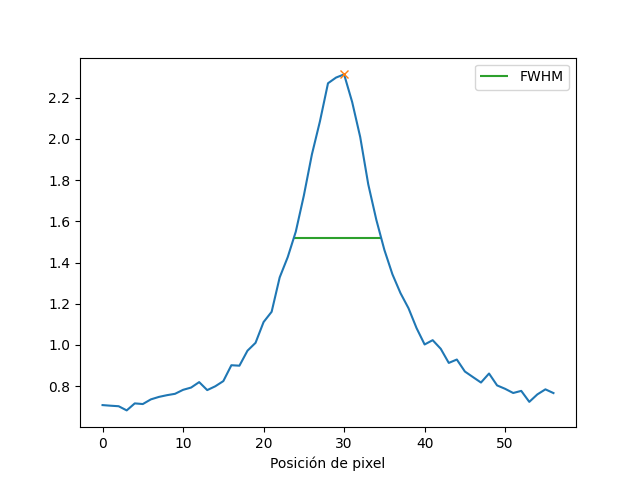

Text(0.5, 0, 'Posición de pixel')

In [58]:
# Graficamos para ver como quedó
plt.figure()
plt.plot(img.pickets.pickets[0].picket_array[pares[19]])
plt.plot(peak, img.pickets.pickets[0].picket_array[pares[19]][peak], "x")
plt.hlines(*results_half[1:], color="C2", label="FWHM")
plt.legend()
plt.xlabel("Posición de pixel")

### Ahora toca hacer para todo el picket

In [59]:
fwhm_picket = []
for par in pares:
    peak, _ = find_peaks(x=img.pickets.pickets[0].picket_array[par], distance=img.pickets.pickets[0].picket_array.shape[1],
                         height=max(img.pickets.pickets[0].picket_array[pares[19]]) / 2)
    results_half = peak_widths(x=img.pickets.pickets[0].picket_array[par], peaks=peak, rel_height=0.5)
    fwhm = results_half[0][0]
    fwhm_picket.append(fwhm)
fwhm_picket

[10.352657211209841,
 10.295474863309877,
 10.403953939422099,
 10.55171931980339,
 10.391134973488047,
 10.455709533358394,
 10.324130154639175,
 10.650344530577087,
 10.622637245970317,
 10.47392550143267,
 10.738313952606926,
 10.489972999509085,
 10.75869499623964,
 10.676099312090834,
 10.58838550114828,
 10.130536526887507,
 10.684574576315494,
 10.410935539692836,
 10.95887221528579,
 10.865191146881287,
 10.79539260617171,
 10.205022109265226,
 10.545844853428456,
 10.982269403956149,
 10.896502007735844,
 10.871682357408478,
 10.4629532484003,
 10.378745881463473,
 10.8548284045272,
 10.629859238308228,
 10.387696875142868,
 10.628447596532702,
 10.60791207164533,
 10.627940193977928,
 10.630828692111884,
 10.23975424708837,
 10.227220388297496,
 10.39664543617355]

In [60]:
# Comprobación: deben ser 38 pues ese número corresponde a los pares de láminas analizadas
len(fwhm_picket)

38

<IPython.core.display.Javascript object>


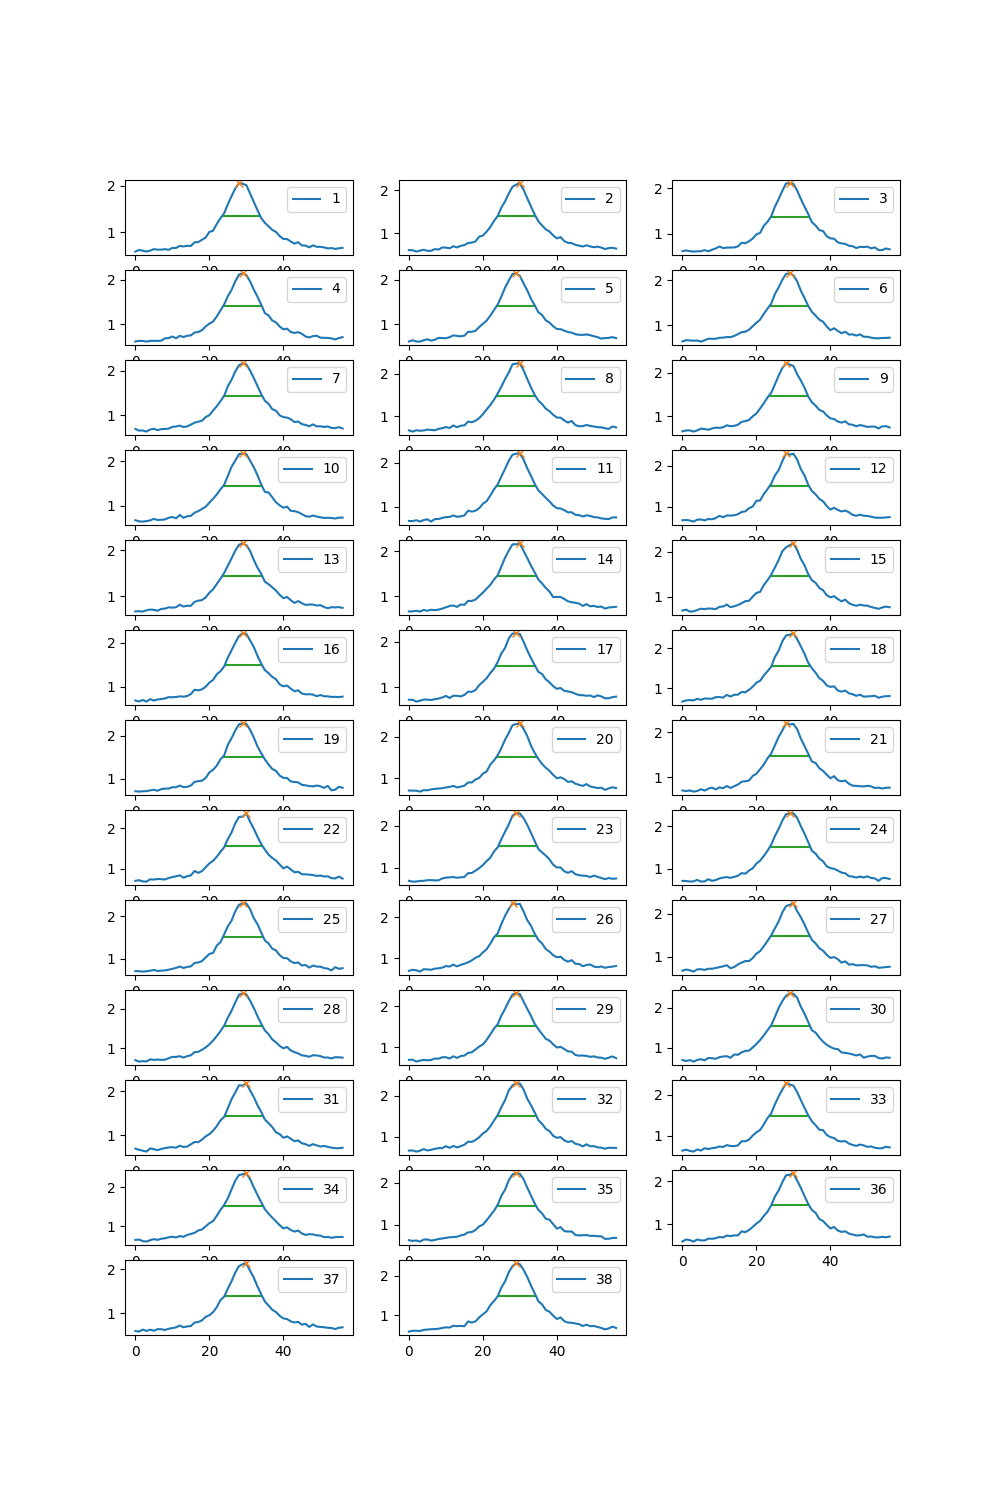

In [61]:
# Viendo todas las imagenes
plt.figure(figsize=(10,15))

for i, par in zip(np.arange(1,39),pares):
    peak, _ = find_peaks(x=img.pickets.pickets[0].picket_array[par], distance=img.pickets.pickets[0].picket_array.shape[1],
                         height=max(img.pickets.pickets[0].picket_array[pares[19]]) / 2)
    results_half = peak_widths(x=img.pickets.pickets[0].picket_array[par], peaks=peak, rel_height=0.5)
    
    ax=plt.subplot(13, 3, i)
    ax.plot(img.pickets.pickets[0].picket_array[par], label=str(i)) # El perfil
    ax.plot(peak, img.pickets.pickets[0].picket_array[par][peak], "x") # el peak
    ax.hlines(*results_half[1:], color="C2") # el fwhm
    plt.legend()
    #plt.xlabel("Posición de pixel")

### Ahora toca hacerlo para todos los pickets

In [62]:
total_pickets = img.num_pickets
total_pickets

10

In [63]:
import numpy as np
fwhm_total = []
for picket in range(total_pickets):
    fwhm_picket = []
    for par in pares:
        peak, _ = find_peaks(x=img.pickets.pickets[picket].picket_array[par],
                             distance=img.pickets.pickets[picket].picket_array.shape[1],
                             height=max(img.pickets.pickets[0].picket_array[pares[19]]) / 2)
        results_half = peak_widths(x=img.pickets.pickets[picket].picket_array[par], peaks=peak, rel_height=0.5)
        fwhm = results_half[0][0]
        fwhm_picket.append(fwhm)
    fwhm_total.append(fwhm_picket)
fwhm_total = np.array(fwhm_total)

In [64]:
fwhm_total.shape

(10, 38)

### Recordar que estos valores están en unidades de pixel, por tanto deben cambiarse a mm para poder hacer una comparación con los TLF

In [65]:
# Pixeles por mm
factor = img.image.dpmm
factor

3.82652222050727

In [66]:
# Haciendo la conversión: 
fwhm_total_mm = fwhm_total / factor

In [67]:
# Podemos ver por par de lámina
fwhm_total_mm[:,0]

array([2.70550035, 2.8779537 , 2.84279554, 2.84830181, 2.64596182,
       2.82948277, 2.74746552, 2.8883034 , 2.69413065, 2.65058131])

In [68]:
# O podemos ver por picket
fwhm_total_mm[0,:]

array([2.70550035, 2.69055666, 2.71890593, 2.75752203, 2.7155559 ,
       2.73243142, 2.69804526, 2.78329614, 2.77605529, 2.73719187,
       2.80628553, 2.74138562, 2.81161179, 2.79002674, 2.76710415,
       2.64745268, 2.79224161, 2.72073045, 2.86392489, 2.83944285,
       2.82120212, 2.66691829, 2.75598683, 2.87003937, 2.84762544,
       2.84113922, 2.73432445, 2.71231821, 2.83673471, 2.77794264,
       2.7146574 , 2.77757373, 2.7722071 , 2.77744113, 2.77819599,
       2.67599498, 2.67271946, 2.71699597])

<IPython.core.display.Javascript object>


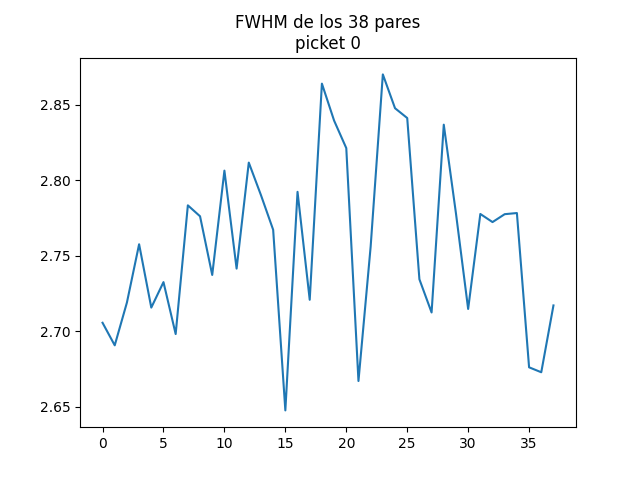

In [69]:
plt.figure()
plt.title("FWHM de los 38 pares\npicket 0")
plt.plot(fwhm_total_mm[0,:])

### Calculando promedios y std por par de lamina y por picket

In [70]:
fwhm_mean_lamina = np.mean(a=fwhm_total_mm, axis=0)
fwhm_mean_lamina

array([2.77304769, 2.81659941, 2.78909444, 2.78578569, 2.8058747 ,
       2.80383041, 2.79895643, 2.83578499, 2.80705329, 2.82204709,
       2.80939777, 2.81334986, 2.83151422, 2.8188519 , 2.8328124 ,
       2.84390597, 2.85866431, 2.83094499, 2.86344141, 2.86281474,
       2.85187933, 2.80934457, 2.85897879, 2.84337705, 2.85515037,
       2.8538129 , 2.85116601, 2.84899689, 2.83519451, 2.82508818,
       2.81495842, 2.83153903, 2.81565614, 2.80261746, 2.80482263,
       2.76995352, 2.78162505, 2.7823743 ])

In [71]:
fwhm_std_lamina = np.std(a=fwhm_total_mm, axis=0)
fwhm_std_lamina

array([0.08977518, 0.08976261, 0.12997232, 0.09782678, 0.0985071 ,
       0.09127786, 0.12692963, 0.10411858, 0.09483536, 0.09397211,
       0.09817878, 0.10173896, 0.10291695, 0.09121398, 0.11086336,
       0.10245828, 0.11045902, 0.11340481, 0.116745  , 0.07995289,
       0.08867527, 0.09809506, 0.10040742, 0.1118815 , 0.0847661 ,
       0.07413176, 0.08171011, 0.11399931, 0.0768008 , 0.09656267,
       0.10330125, 0.09879765, 0.07553262, 0.08559307, 0.06294896,
       0.12340281, 0.09412354, 0.11323339])

In [72]:
fwhm_mean_picket = np.mean(a=fwhm_total_mm, axis=1)
fwhm_mean_picket

array([2.75908643, 3.0053125 , 2.82609685, 2.8651704 , 2.80426942,
       2.86940107, 2.76041001, 2.88081652, 2.79141926, 2.65915094])

In [73]:
fwhm_std_picket = np.std(a=fwhm_total_mm, axis=1)
fwhm_std_picket

array([0.05699203, 0.06114478, 0.05011683, 0.04715292, 0.06556093,
       0.06058054, 0.05331807, 0.04405534, 0.03944719, 0.04960676])

# Conclusiones
* El gap parece ser de 3 mm a SID (Distancia fuente-EPID) de 150 cm
* Meta 1 cumplida

# Meta 2
Cargamos en memoria el archivo TLF asociado

In [74]:
from pylinac import log_analyzer as logan

In [75]:
#tlf = logan.TrajectoryLog(filename=r"../TLF_Ling/T12PFError/RA QA_T1.2_PF_errorM_T1.2_PF_RA_error_20200103124306.bin", exclude_beam_off=True)
#tlf = logan.TrajectoryLog(filename=r"../TLF_Ling/T11PFRA/RA QA_T1.1_PF_RA_M_T1.1_PF_RA_20200103123654.bin", exclude_beam_off=True)
tlf = logan.TrajectoryLog(filename=r"../TLF_Ling/T02/PF_0/RA QA_PF Stat M_PF Stat 0_20200103121231.bin", exclude_beam_off=True)

Importamos función que convierte tlf a DataFrame

In [76]:
def crear_df(tlf):
    """ Crea un DataFrame con información extraida de un archivo de registro de trayectoria (TLF)"""
    import pandas as pd
    
    # Inicializamos Dataframe
    df_tlf = pd.DataFrame() 
    
    # columna de tiempo (en ms)
    df_tlf["time"] = [20 * elem for elem in range(tlf.header.num_snapshots)] 
    
    # Movimiento angular del MLC (en grados)
    df_tlf["collimator_actual"] = tlf.axis_data.collimator.actual
    df_tlf["collimator_expected"] = tlf.axis_data.collimator.expected
    print("¿Giró el MLC durante el tratamiento?\t\t\t {}".format(tlf.axis_data.collimator.moved))
    
    # Información sobre beam_hold
    df_tlf["beamhold_actual"] = tlf.axis_data.beam_hold.actual
    df_tlf["beamhold_expected"] = tlf.axis_data.beam_hold.expected
    
    # Información sobre la posición de los bancos A y B del MLC
    df_tlf["positionA_actual"] = tlf.axis_data.carriage_A.actual
    df_tlf["positionA_expected"] = tlf.axis_data.carriage_A.expected
    df_tlf["positionB_actual"] = tlf.axis_data.carriage_B.actual
    df_tlf["positionB_expected"] = tlf.axis_data.carriage_B.expected
    print("¿Se movieron los bancos A y B durante el tratamiento?\t {}"
          .format(tlf.axis_data.carriage_A.moved, tlf.axis_data.carriage_B.moved))
    print("")
    # Información sobre la mesa de tratamiento
    print("Información sobre movimiento de la mesa de tratamiento:")
    # lateral
    df_tlf["couchlatl_actual"] = tlf.axis_data.couch.latl.actual
    df_tlf["couchlatl_expected"] = tlf.axis_data.couch.latl.expected
    print("Lateral\t\t {}".format(tlf.axis_data.couch.latl.moved))
    # longitudinal
    df_tlf["couchlong_actual"] = tlf.axis_data.couch.long.actual
    df_tlf["couchlong_expected"] = tlf.axis_data.couch.long.expected
    print("Longitudinal\t {}".format(tlf.axis_data.couch.long.moved))
    # pitch
    df_tlf["couchpitch_actual"] = tlf.axis_data.couch.pitch.actual
    df_tlf["couchpitch_expected"] = tlf.axis_data.couch.pitch.expected
    print("Pitch\t\t {}".format(tlf.axis_data.couch.pitch.moved))
    # roll
    df_tlf["couchroll_actual"] = tlf.axis_data.couch.roll.actual
    df_tlf["couchroll_expected"] = tlf.axis_data.couch.roll.expected
    print("Roll\t\t {}".format(tlf.axis_data.couch.roll.moved))
    # rotn
    df_tlf["couchrotn_actual"] = tlf.axis_data.couch.rotn.actual
    df_tlf["couchrotn_expected"] = tlf.axis_data.couch.rotn.expected
    print("Rotacional\t {}".format(tlf.axis_data.couch.rotn.moved))
    # vertical
    df_tlf["couchvert_actual"] = tlf.axis_data.couch.vert.actual
    df_tlf["couchvert_expected"] = tlf.axis_data.couch.vert.expected
    print("Vertical\t {}".format(tlf.axis_data.couch.vert.moved))
    
    print("")
    # Información de la posición angular del gantry
    df_tlf["gantry_actual"] = tlf.axis_data.gantry.actual
    df_tlf["gantry_expected"] = tlf.axis_data.gantry.expected
    print("¿Se movió el gantry?\t {}".format(tlf.axis_data.gantry.moved))
    
    # Información sobre el movimiento de las quijadas del MLC
    df_tlf["jawx1_actual"] = tlf.axis_data.jaws.x1.actual
    df_tlf["jawx1_expected"] = tlf.axis_data.jaws.x1.expected
    df_tlf["jawx2_actual"] = tlf.axis_data.jaws.x2.actual
    df_tlf["jawx2_expected"] = tlf.axis_data.jaws.x2.expected
    df_tlf["jawy1_actual"] = tlf.axis_data.jaws.y1.actual
    df_tlf["jawy1_expected"] = tlf.axis_data.jaws.y1.expected
    df_tlf["jawy2_actual"] = tlf.axis_data.jaws.y2.actual
    df_tlf["jawy2_expected"] = tlf.axis_data.jaws.y2.expected
    print("Se movieron las quijadas X1, X2, Y1, Y2 durante el tratamiento?\t {}".format((tlf.axis_data.jaws.x1.moved,
                                                                                   tlf.axis_data.jaws.x2.moved,
                                                                                   tlf.axis_data.jaws.y1.moved,
                                                                                   tlf.axis_data.jaws.y2.moved)))
    
    # Información de la posición de las hojas del MLC
    for index in range(1,121):
        df_tlf["leaf{}_actual".format(index)] = tlf.axis_data.mlc.leaf_axes[index].actual
        df_tlf["leaf{}_expected".format(index)] = tlf.axis_data.mlc.leaf_axes[index].expected
    print("Número de snapshots consideradas\t {}".format(tlf.axis_data.mlc.num_snapshots))
    print("")
    
    # Información sobre las unidades monitor administradas
    df_tlf["mu_actual"] = tlf.axis_data.mu.actual
    df_tlf["mu_expected"] = tlf.axis_data.mu.expected
    
    print("Hojas del Banco A no estáticas durante tratamiento:\n{}".format(tlf.axis_data.mlc.get_leaves(bank='A', only_moving_leaves=True)))
    print("Hojas del Banco B no estáticas durante tratamiento:\n{}".format(tlf.axis_data.mlc.get_leaves(bank='B', only_moving_leaves=True)))

    return df_tlf

In [77]:
df_tlf = crear_df(tlf)

¿Giró el MLC durante el tratamiento?			 False
¿Se movieron los bancos A y B durante el tratamiento?	 False

Información sobre movimiento de la mesa de tratamiento:
Lateral		 False
Longitudinal	 False
Pitch		 False
Roll		 False
Rotacional	 False
Vertical	 False

¿Se movió el gantry?	 False
Se movieron las quijadas X1, X2, Y1, Y2 durante el tratamiento?	 (False, False, False, False)
Número de snapshots consideradas	 716

Hojas del Banco A no estáticas durante tratamiento:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60]
Hojas del Banco B no estáticas durante tratamiento:
[ 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120]


#### comprobamos posiciones angulares de colimador y gantry respecto a los valores obtenidos anteriormente

<IPython.core.display.Javascript object>


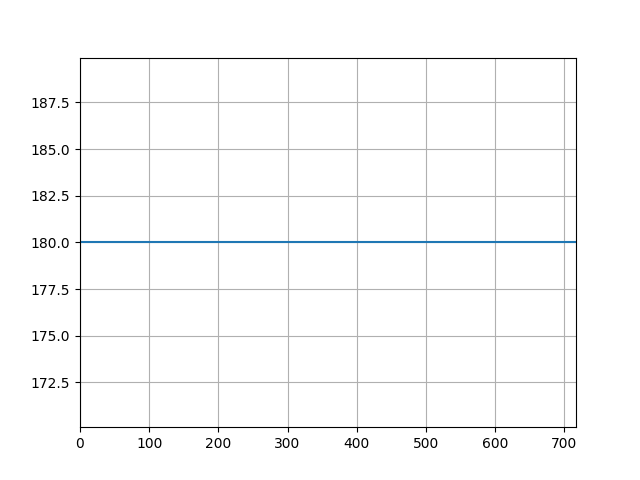

In [78]:
plt.figure()
tlf.axis_data.gantry.plot_expected()

In [79]:
# El gantry giró en el siguiente intervalo angular
tlf.axis_data.gantry.expected.min(), tlf.axis_data.gantry.expected.max()
# Podemos ver que no se debe confiar en lo contenido en el DICOM respecto a la posición angular del gnatry

(180.0, 180.0)

<IPython.core.display.Javascript object>


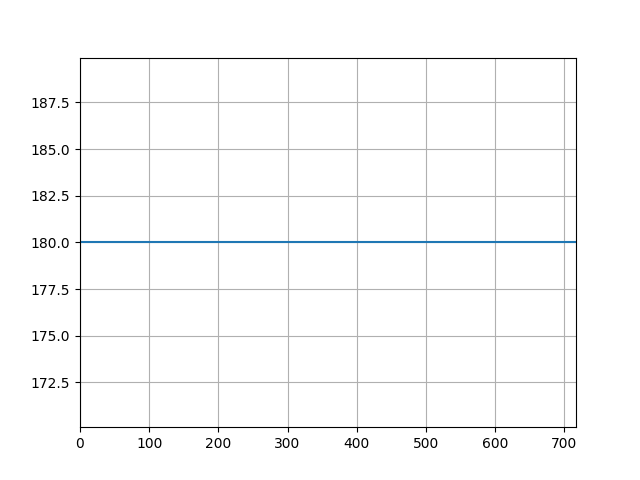

In [80]:
plt.figure()
tlf.axis_data.collimator.plot_expected()

In [81]:
tlf.axis_data.collimator.moved # El colimador no se movió y estuvo siempre en 180
# EL DICOM dice que estuvo a 0°, por tanto tampoco se debe confiar en su contenido respecto a este valor.

False

In [82]:
# Las desviaciones (o errores) son las diferencias entre las posiciones actuales y esperadas de cada una de las hojas
# Inicializamos arreglos:
error_array = []
max_desv_array = []
min_desv_array = []
mean_desv_array = []
std_desv_array = []

for index in range(1,121):
    temp_array = df_tlf["leaf{}_actual".format(index)] - df_tlf["leaf{}_expected".format(index)]
    
    # El resultado anterior (es una pd.Series) lo agregamos a la lista error_array:
    error_array.append(temp_array)
    
    # Calculamos valores particulares:
    max_desv_array.append(temp_array.max())
    min_desv_array.append(temp_array.min())
    mean_desv_array.append(temp_array.mean())
    std_desv_array.append(temp_array.std())

# Convertimos las listas en arrays tipo numpy
error_array = np.array(error_array)
max_desv_array = np.array(max_desv_array)
min_desv_array = np.array(min_desv_array)
mean_desv_array = np.array(mean_desv_array)
std_desv_array = np.array(std_desv_array)

df_bankA = pd.DataFrame(data=abs(error_array[:60]) * 10,
                        index=tlf.axis_data.mlc.get_leaves(bank="A"),columns=df_tlf["time"] / 1000)
df_bankB = pd.DataFrame(data=abs(error_array[60:]) * 10,
                        index=tlf.axis_data.mlc.get_leaves(bank="B"),columns=df_tlf["time"] / 1000)

2021-03-10 12:52:10 - NumExpr defaulting to 4 threads.


<IPython.core.display.Javascript object>


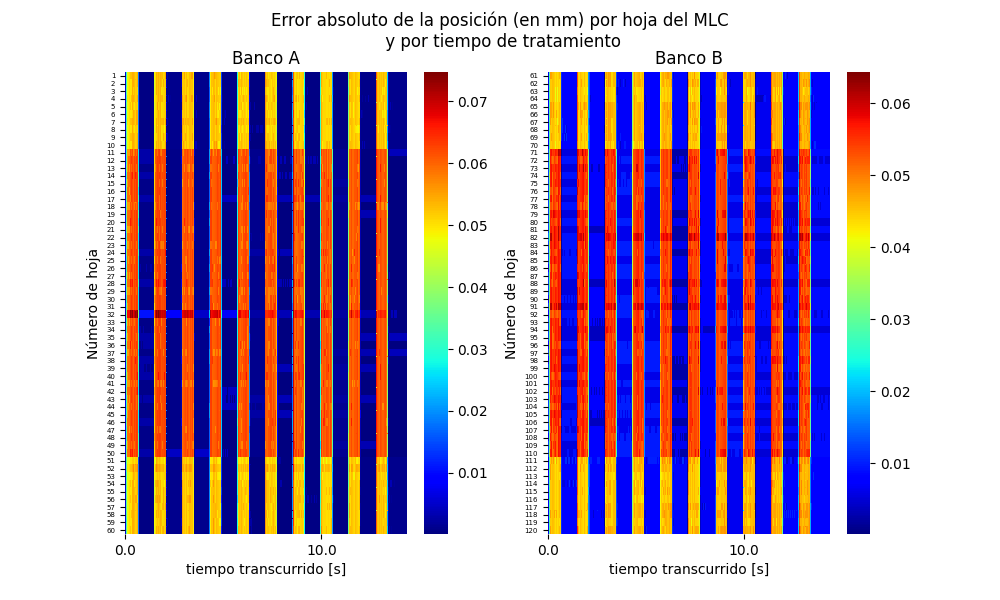

In [83]:
import seaborn as sns
# Gráfica 2 (izquierda)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
fig.suptitle("Error absoluto de la posición (en mm) por hoja del MLC\n y por tiempo de tratamiento")

# Banco A
sns.heatmap(data=df_bankA,yticklabels=1,xticklabels=500, ax=axs[0], cmap="jet")
axs[0].set_xlabel("tiempo transcurrido [s]")
for tick in axs[0].get_yticklabels():
    #tick.set_rotation(45)
    tick.set_size(5)
axs[0].set_ylabel("Número de hoja")
axs[0].set_title("Banco A")

# Banco B
sns.heatmap(data=df_bankB,yticklabels=1,xticklabels=500, ax=axs[1], cmap="jet")
axs[1].set_xlabel("tiempo transcurrido [s]")
for tick in axs[1].get_yticklabels():
    #tick.set_rotation(45)
    tick.set_size(5.)
axs[1].set_ylabel("Número de hoja")
axs[1].set_title("Banco B");

## Mapas de fluencia

In [84]:
# primero se calculan los mapas de fluencia
tlf.fluence.actual.calc_map(resolution=0.1, equal_aspect=False);
tlf.fluence.expected.calc_map(resolution=0.1, equal_aspect=False);

<IPython.core.display.Javascript object>


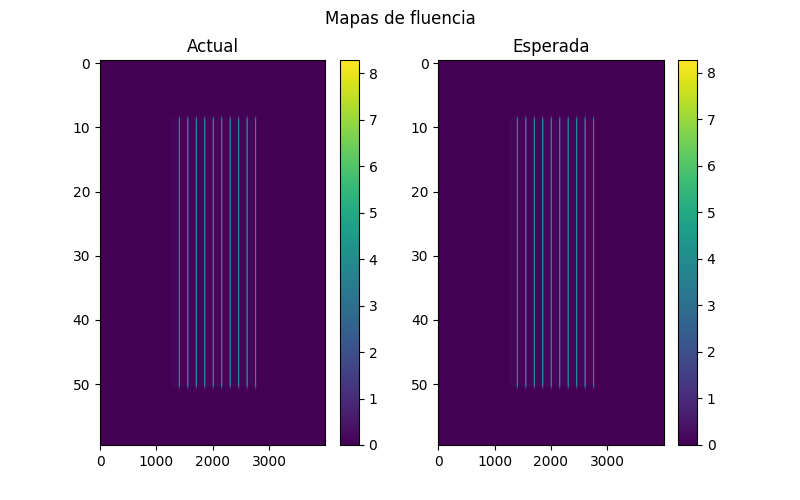

In [85]:
# hay problemas a la hora de graficar en grupos con las funciones integradas de graficación de pylinac
# Para sortear el problema, grafico el array resultante con imshow() (TODO: mejorar la apariencia)
plt.figure(figsize=(8,5))
plt.suptitle("Mapas de fluencia")
plt.subplot(121)
plt.title("Actual")
plt.imshow(tlf.fluence.actual.array, aspect='auto')
plt.colorbar()
#tlf_demo.fluence.actual.plot_map()
plt.subplot(122)
plt.title("Esperada")
plt.imshow(tlf.fluence.expected.array, aspect='auto')
plt.colorbar();

## Mapa de índice gamma

In [86]:
def metricas_error_mlc(tlf):
    import numpy as np
    index_A = tlf.axis_data.mlc.get_leaves(bank="A", only_moving_leaves=True) - 1
    index_B = tlf.axis_data.mlc.get_leaves(bank="B", only_moving_leaves=True) - 1
    index_both = tlf.axis_data.mlc.get_leaves(bank="both") - 1
    abs_array_A = tlf.axis_data.mlc.create_error_array(leaves=index_A, absolute=True)
    abs_array_B = tlf.axis_data.mlc.create_error_array(leaves=index_B, absolute=True)
    abs_array_both = tlf.axis_data.mlc.create_error_array(leaves=index_both, absolute=True)
    dic = {
        "error promedio de Banco A (mm)": 10 * abs_array_A.mean(),
        "error promedio de Banco B (mm)": 10 * abs_array_B.mean(),
        "error promedio de ambos bancos (mm)": 10 * abs_array_both.mean(),
        "error máximo del Banco A (mm)": 10 * abs_array_A.max(),
        "error máximo del Banco B (mm)": 10 * abs_array_B.max(),
        "error máximo ambos bancos (mm)": 10 * abs_array_both.max(),
        "error percentil 95 Banco A (mm)": 10 * np.quantile(a=abs_array_A,q=0.95),
        "error percentil 95 Banco B (mm)": 10 * np.quantile(a=abs_array_B,q=0.95),
        "error percentil 95 ambos bancos (mm)": 10 * np.quantile(a=abs_array_both,q=0.95)
    }
    return pd.Series(dic)
metricas_error_mlc(tlf=tlf)

# mu:
def metricas_mu(tlf):
    import numpy as np
    abs_array = abs(tlf.axis_data.mu.difference)
    dic = {
        "promedio abserror mu": abs_array.mean(),
        "std abserror mu": abs_array.std(),
        "max abserror mu": abs_array.max(),
        "percentil 95 mu": np.quantile(a=abs_array,q=0.95),
        "RMSD" : np.sqrt(np.sum(abs_array ** 2) / abs_array.size)
    }
    return pd.Series(dic)
metricas_mu(tlf=tlf)

promedio abserror mu    0.010942
std abserror mu         0.008240
max abserror mu         0.029305
percentil 95 mu         0.027039
RMSD                    0.013698
dtype: float64

<IPython.core.display.Javascript object>


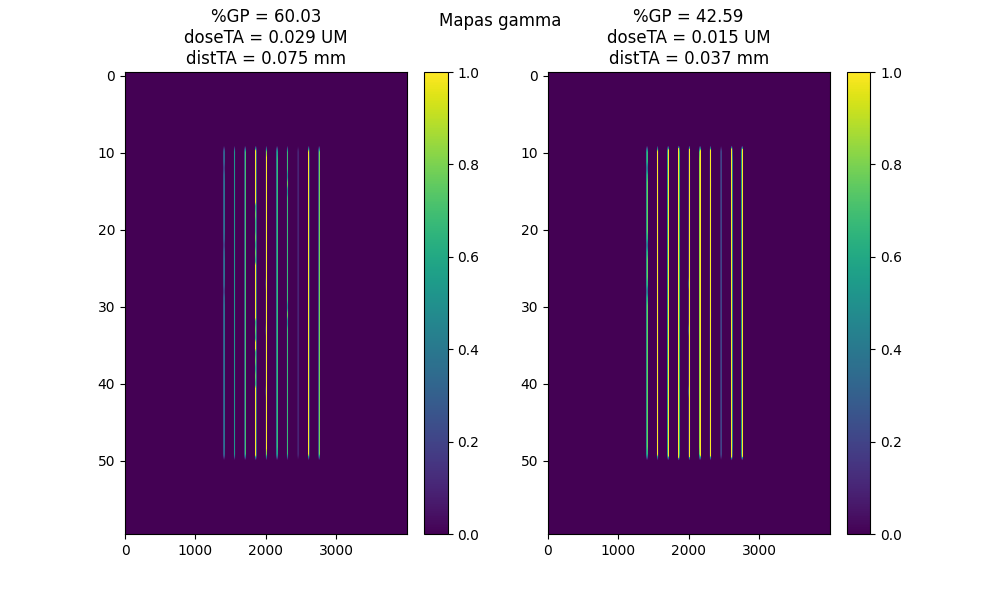

In [87]:
plt.figure(figsize=(10,6))
plt.suptitle("Mapas gamma")

plt.subplot(1,2,1)
doseTA = metricas_mu(tlf)["max abserror mu"]
distTA = metricas_error_mlc(tlf)["error máximo ambos bancos (mm)"] / 10 # lo regresamos a centímetros
tlf.fluence.gamma.calc_map(doseTA=doseTA, distTA=distTA, threshold=0.1, resolution=0.1, calc_individual_maps=False);
gp_percentage = tlf.fluence.gamma.pass_prcnt
plt.title("%GP = {:.2f}\ndoseTA = {:.3f} UM\ndistTA = {:.3f} mm".format(gp_percentage,doseTA, distTA * 10))
tlf.fluence.gamma.plot_map()

plt.subplot(1,2,2)
doseTA_2 = metricas_mu(tlf)["max abserror mu"] * 0.5
distTA_2 = metricas_error_mlc(tlf)["error máximo ambos bancos (mm)"] / 10 * 0.5 # lo regresamos a centímetros
tlf.fluence.gamma.calc_map(doseTA=doseTA_2, distTA=distTA_2, threshold=0.1, resolution=0.1, calc_individual_maps=False);
gp_percentage = tlf.fluence.gamma.pass_prcnt
plt.title("%GP = {:.2f}\ndoseTA = {:.3f} UM\ndistTA = {:.3f} mm".format(gp_percentage,doseTA_2, distTA_2 * 10))
tlf.fluence.gamma.plot_map()

De acuerdo con la documentación del módulo, los pares de hojas son de la siguiente forma: (1,61), (2,62) ... (60,120), es decir, tienen un offset de 60; diferente a como se venian mostrando los pares de hoja en el módulo PicketFence.

In [88]:
# Haciendo una prueba particular:
diferencia_par161 = tlf.axis_data.mlc.leaf_axes[61].actual + tlf.axis_data.mlc.leaf_axes[1].actual
diferencia_par161[:10]

array([0.09989405, 0.09989405, 0.09989405, 0.09989405, 0.09992647,
       0.09978199, 0.09983301, 0.0993681 , 0.09969902, 0.09976912])

Estas mediciones se obtuvieron directamente del controlador del MLC, el cual tiene una distancia fuente-MLC = 53.8 cm (RPT_72 de la AAPM - Tabla de Addendum). Sin embargo, para que sean comparables con las mediciones realizadas con el EPID (las cuales tienen un valor mayor debido al efecto de magnificación), que tiene una distancia fuente-EPID = 150 cm, se debe utilizar un factor de escala dado precisamente por la división entre estas distancias = 150 / 53.8

In [89]:
factor_escala = float(img.image.metadata.RTImageSID) / (53.8*10)
factor_escala

2.7880979747934016

In [90]:
# Multiplicando por el factor de escala y convirtiendo a mm (nota el signo "+" en la ecuación)
diferencia_par1272 = tlf.axis_data.mlc.leaf_axes[12].actual + tlf.axis_data.mlc.leaf_axes[72].actual
diferencia_par1272 = diferencia_par1272 * factor_escala * 10
diferencia_par1272

array([2.77518617, 2.77518617, 2.77518617, 2.77518617, 2.7653747 ,
       2.78723116, 2.7688579 , 2.78061041, 2.78106243, 2.78176704,
       2.77191568, 2.7726203 , 2.77332492, 2.76134641, 2.77083881,
       2.75864758, 2.76682382, 2.76320766, 2.77038679, 2.76678393,
       2.76316778, 2.75955162, 2.76674405, 2.76312789, 2.75951174,
       2.75589558, 2.75229272, 2.75947185, 2.77699425, 2.77360411,
       2.75921926, 2.77695437, 2.77335151, 2.76819317, 2.77235441,
       2.77864279, 2.75315688, 2.7533563 , 2.7533563 , 2.7533563 ,
       2.7533563 , 2.7533563 , 2.7533563 , 2.7533563 , 2.7533563 ,
       2.7533563 , 2.7533563 , 2.7533563 , 2.7533563 , 2.7533563 ,
       2.7533563 , 2.7533563 , 2.7533563 , 2.7533563 , 2.7533563 ,
       2.7533563 , 2.7533563 , 2.7533563 , 2.7533563 , 2.7533563 ,
       2.7533563 , 2.7533563 , 2.7533563 , 2.7533563 , 2.7533563 ,
       2.7533563 , 2.7533563 , 2.7533563 , 2.7533563 , 2.7533563 ,
       2.7533563 , 2.7533563 , 2.7533563 , 2.7533563 , 2.75335

Estos valores son del mismo orden de magnitud a los obtenidos por el módulo PicketFence. Lo que nos dice que vamos por buen camino :'D

<IPython.core.display.Javascript object>


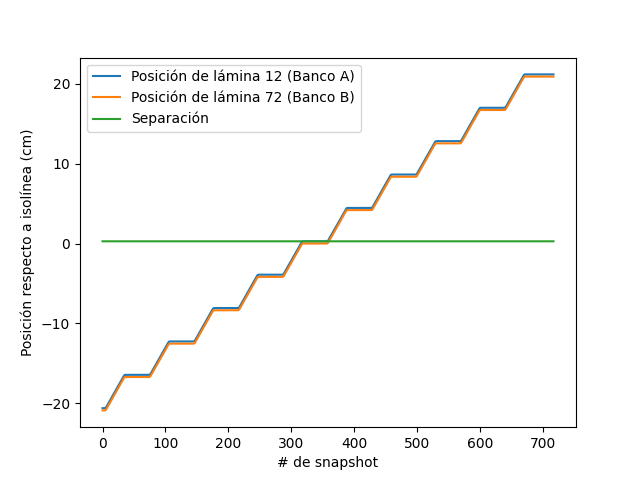

In [91]:
# Graficamos las posiciones y la diferencia para un par de hoja particular
plt.figure()
plt.plot(tlf.axis_data.mlc.leaf_axes[12].actual * factor_escala , label="Posición de lámina 12 (Banco A)")
plt.plot(tlf.axis_data.mlc.leaf_axes[72].actual * -factor_escala ,  label="Posición de lámina 72 (Banco B)")
plt.plot(diferencia_par1272 / 10,  label="Separación")
plt.legend()
plt.xlabel("# de snapshot")
plt.ylabel("Posición respecto a isolínea (cm)");

La gráfica anterior muestra que la posición guardada en el TLF tiene como punto de referencia la linea central del colimador. Es decir, qué tan cerca o lejos está de dicha linea. Por tanto, la zona izquierda en donde se encuentra el Banco A es negativa si todas las láminas están retraidas; y la zona derecha en donde se encuentra el Banco B es positiva.

#### Submeta: Con el factor de escala ya calculado y los pares de hoja ya identificados, voy a promediar los gaps por par de laminas (son 38 en total)
Debo recordar que sólo se pudieron identificar 38 pares de láminas del MLC debido al tamaño del EPID, por tanto la extracción de estos promedios sólo se centrará en dichos pares, los cuales tienen los siguientes índices: (12,72) ... (49-109)

<IPython.core.display.Javascript object>


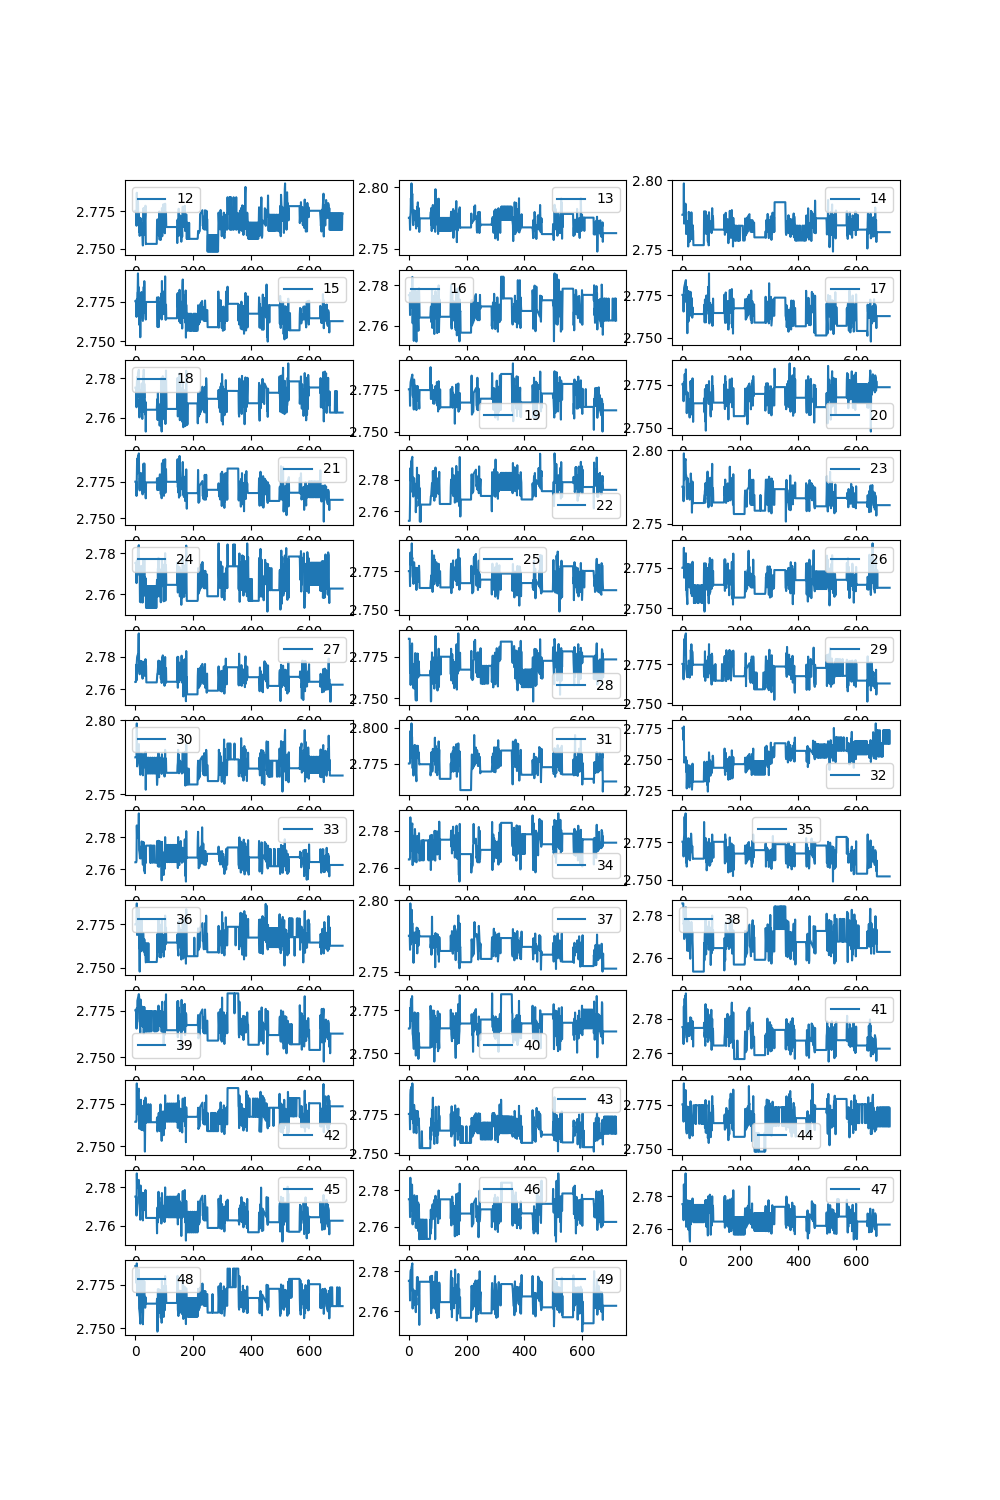

In [92]:
# Viendo todas las imagenes
plt.figure(figsize=(10,15))

for index in range(1,61):
    if (index > 11) and (index < 50): 
        # promedios
        gaps = tlf.axis_data.mlc.leaf_axes[index].actual + tlf.axis_data.mlc.leaf_axes[60 + index].actual
        gaps = gaps * factor_escala * 10
    
        ax=plt.subplot(13, 3, index - 11)
        plt.plot(gaps, label=str(index))
        plt.legend()
    #plt.xlabel("Posición de pixel")

In [93]:
# código que toma en cuenta in indexado como lo dice la documentación del módulo
gap_mean_tlf = []
gap_std_tlf = []
for index in range(1,61):
    if (index > 11) and (index < 50): 
        # promedios
        gaps = tlf.axis_data.mlc.leaf_axes[index].actual + tlf.axis_data.mlc.leaf_axes[60 + index].actual
        gap_mean_tlf.append(gaps.mean())
        # std
        gap_std_tlf.append(gaps.std())
gap_mean_tlf = np.array(gap_mean_tlf) * factor_escala * 10
gap_std_tlf = np.array(gap_std_tlf) * factor_escala * 10

In [94]:
## Código que toma en cuenta el indexado de láminas como en el módulo PicketFence
# gap_mean_tlf = []
# gap_std_tlf = []
# for index in range(1,61):
#     if (index > 11) and (index < 50):
#         # promedios
#         gaps = tlf.axis_data.mlc.leaf_axes[index].actual + tlf.axis_data.mlc.leaf_axes[120 - index - 1].actual
#         gap_mean_tlf.append(gaps.mean())
#         # std
#         gap_std_tlf.append(gaps.std())
# gap_mean_tlf = np.array(gap_mean_tlf) * factor_escala * 10
# gap_std_tlf = np.array(gap_std_tlf) * factor_escala * 10

In [95]:
gap_mean_tlf.shape, gap_std_tlf.shape

((38,), (38,))

In [96]:
gap_mean_tlf

array([2.7677845 , 2.771079  , 2.76640957, 2.76709546, 2.76836196,
       2.76343535, 2.76979696, 2.77045134, 2.76818182, 2.77036972,
       2.7742095 , 2.76730693, 2.76616468, 2.76944985, 2.76612862,
       2.76624697, 2.77097978, 2.76960412, 2.76843476, 2.77244614,
       2.75187741, 2.76763542, 2.77361862, 2.76708074, 2.76569593,
       2.76480773, 2.7671265 , 2.76575584, 2.76690913, 2.76804241,
       2.76972529, 2.76415668, 2.76761294, 2.76455437, 2.76975589,
       2.76649736, 2.76755541, 2.76513952])

In [97]:
gap_std_tlf

array([0.00843568, 0.00705208, 0.00762147, 0.00673164, 0.00637247,
       0.00689342, 0.00599058, 0.00664369, 0.00634268, 0.00708297,
       0.00708661, 0.00676037, 0.00754597, 0.00634948, 0.00638193,
       0.00590392, 0.00753607, 0.00627707, 0.00702954, 0.00829741,
       0.01003282, 0.00532794, 0.00573164, 0.00756717, 0.00687103,
       0.00811687, 0.00743005, 0.00771664, 0.00743675, 0.00691572,
       0.00688432, 0.00739788, 0.00770303, 0.00582263, 0.00727336,
       0.00583707, 0.00690619, 0.00668519])

In [98]:
fwhm_mean_lamina

array([2.77304769, 2.81659941, 2.78909444, 2.78578569, 2.8058747 ,
       2.80383041, 2.79895643, 2.83578499, 2.80705329, 2.82204709,
       2.80939777, 2.81334986, 2.83151422, 2.8188519 , 2.8328124 ,
       2.84390597, 2.85866431, 2.83094499, 2.86344141, 2.86281474,
       2.85187933, 2.80934457, 2.85897879, 2.84337705, 2.85515037,
       2.8538129 , 2.85116601, 2.84899689, 2.83519451, 2.82508818,
       2.81495842, 2.83153903, 2.81565614, 2.80261746, 2.80482263,
       2.76995352, 2.78162505, 2.7823743 ])

In [99]:
fwhm_std_lamina

array([0.08977518, 0.08976261, 0.12997232, 0.09782678, 0.0985071 ,
       0.09127786, 0.12692963, 0.10411858, 0.09483536, 0.09397211,
       0.09817878, 0.10173896, 0.10291695, 0.09121398, 0.11086336,
       0.10245828, 0.11045902, 0.11340481, 0.116745  , 0.07995289,
       0.08867527, 0.09809506, 0.10040742, 0.1118815 , 0.0847661 ,
       0.07413176, 0.08171011, 0.11399931, 0.0768008 , 0.09656267,
       0.10330125, 0.09879765, 0.07553262, 0.08559307, 0.06294896,
       0.12340281, 0.09412354, 0.11323339])

In [100]:
leaf_nums[::-1]

[[12, 109],
 [13, 108],
 [14, 107],
 [15, 106],
 [16, 105],
 [17, 104],
 [18, 103],
 [19, 102],
 [20, 101],
 [21, 100],
 [22, 99],
 [23, 98],
 [24, 97],
 [25, 96],
 [26, 95],
 [27, 94],
 [28, 93],
 [29, 92],
 [30, 91],
 [31, 90],
 [32, 89],
 [33, 88],
 [34, 87],
 [35, 86],
 [36, 85],
 [37, 84],
 [38, 83],
 [39, 82],
 [40, 81],
 [41, 80],
 [42, 79],
 [43, 78],
 [44, 77],
 [45, 76],
 [46, 75],
 [47, 74],
 [48, 73],
 [49, 72]]

In [101]:
dic = {
    "gap_mean":gap_mean_tlf,
    "gap_std":gap_std_tlf,
    "fwhm_mean":fwhm_mean_lamina,
    "fwhm_std":fwhm_std_lamina
}
resultados = pd.DataFrame(dic, index=["{}-{}".format(x[0],x[0] + 60) for x in leaf_nums[::-1]])

In [102]:
resultados

,gap_mean,gap_std,fwhm_mean,fwhm_std
12-72,2.767784,0.008436,2.773048,0.089775
13-73,2.771079,0.007052,2.816599,0.089763
14-74,2.766410,0.007621,2.789094,0.129972
15-75,2.767095,0.006732,2.785786,0.097827
16-76,2.768362,0.006372,2.805875,0.098507
17-77,2.763435,0.006893,2.803830,0.091278
18-78,2.769797,0.005991,2.798956,0.126930
19-79,2.770451,0.006644,2.835785,0.104119
20-80,2.768182,0.006343,2.807053,0.094835
21-81,2.770370,0.007083,2.822047,0.093972


<IPython.core.display.Javascript object>


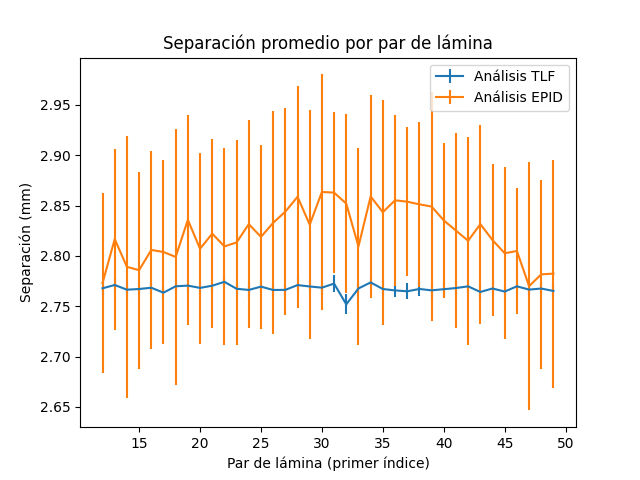

In [103]:
plt.figure()
plt.title("Separación promedio por par de lámina")
plt.xlabel("Par de lámina (primer índice)")
plt.ylabel("Separación (mm)")
plt.errorbar(x=np.arange(12,50), y=gap_mean_tlf, yerr=gap_std_tlf, label="Análisis TLF")
plt.errorbar(x=np.arange(12,50), y=fwhm_mean_lamina, yerr=fwhm_std_lamina, label="Análisis EPID")
#plt.ylim(bottom=2.65, top=3.)
plt.legend();

La gráfica anterior muestra que existe un salto en el par número 35, que no fue detectado con el análisis de la imagen EPID, pero que sí pudo detectarse mediante el análisis del TLF.

In [104]:
# Trayendo los datos necesarios:


In [105]:
df_fwhm = pd.DataFrame(data=fwhm_total_mm.transpose(), index=["{}-{}".format(x[0],x[0] + 60) for x in leaf_nums[::-1]])

In [106]:
df_fwhm

,0,1,2,3,4,5,6,7,8,9
12-72,2.705500,2.877954,2.842796,2.848302,2.645962,2.829483,2.747466,2.888303,2.694131,2.650581
13-73,2.690557,2.981053,2.800362,2.907497,2.720507,2.850682,2.794410,2.909576,2.788536,2.722815
14-74,2.718906,3.037745,2.824772,2.780307,2.847788,2.852587,2.591093,2.880260,2.782371,2.575115
15-75,2.757522,2.903677,2.845387,2.797804,2.718665,2.815632,2.698371,2.947583,2.782574,2.590643
16-76,2.715556,3.053731,2.824055,2.753361,2.704161,2.880278,2.802741,2.830781,2.768531,2.725552
17-77,2.732431,2.926034,2.815848,2.860413,2.704825,2.943935,2.734982,2.887379,2.757694,2.674763
18-78,2.698045,3.127017,2.768998,2.865267,2.746783,2.826233,2.664866,2.846331,2.760322,2.685701
19-79,2.783296,3.086835,2.792758,2.888741,2.803581,2.844557,2.800500,2.874802,2.831577,2.651203
20-80,2.776055,2.996080,2.749676,2.794391,2.682732,2.898223,2.789234,2.835930,2.880650,2.667563
21-81,2.737192,3.034801,2.764667,2.845914,2.764513,2.948625,2.776805,2.818655,2.809380,2.719920


In [107]:
gaps_leafs = [] 
for index in range(1,61):
    if (index > 11) and (index < 50): 
        gaps = tlf.axis_data.mlc.leaf_axes[index].actual + tlf.axis_data.mlc.leaf_axes[60 + index].actual
        gaps = gaps  * factor_escala * 10
        gaps_leafs.append(gaps)
gaps_leafs = np.array(gaps_leafs)
df_gaps_leafs = pd.DataFrame(data=gaps_leafs, index=["{}-{}".format(x[0],x[0] + 60) for x in leaf_nums[::-1]])

In [108]:
df_gaps_leafs.head()

,0,1,2,3,4,5,6,7,8,9,...,708,709,710,711,712,713,714,715,716,717
12-72,2.775186,2.775186,2.775186,2.775186,2.765375,2.787231,2.768858,2.780610,2.781062,2.781767,...,2.773498,2.762702,2.773498,2.773498,2.762702,2.773498,2.773498,2.762702,2.773498,2.773498
13-73,2.775186,2.775186,2.775186,2.775186,2.765375,2.776423,2.779401,2.791166,2.781062,2.803132,...,2.762702,2.762702,2.762702,2.762702,2.762702,2.762702,2.762702,2.762702,2.762702,2.762702
14-74,2.775186,2.775186,2.775186,2.775186,2.775931,2.797787,2.768858,2.769802,2.781062,2.771211,...,2.762702,2.762702,2.762702,2.762702,2.762702,2.762702,2.762702,2.762702,2.762702,2.762702
15-75,2.775186,2.775186,2.775186,2.775186,2.765375,2.776423,2.768858,2.780610,2.781062,2.792576,...,2.762702,2.762702,2.762702,2.762702,2.762702,2.762702,2.762702,2.762702,2.762702,2.762702
16-76,2.775186,2.775186,2.775186,2.775186,2.765375,2.776423,2.768858,2.769802,2.770506,2.771211,...,2.762702,2.762702,2.762702,2.762702,2.773498,2.773498,2.762702,2.762702,2.773498,2.762702


In [109]:
t, pval = stats.ttest_ind(a=df_fwhm.iloc[0], b=df_gaps_leafs.iloc[0], equal_var=False)

In [110]:
pval

0.8642893283021589

In [113]:
pvalues = []
count = 0
for index in range(df_fwhm.shape[0]):
    t, pval = stats.ttest_ind(a=df_fwhm.iloc[index], b=df_gaps_leafs.iloc[index], equal_var=False)
    pvalues.append(pval)
    if pval <= 0.05:
        count += 1
pvalues
print("Número total de columnas que muestran una diferencia estadística: {}".format(count))

Número total de columnas que muestran una diferencia estadística: 10
